In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


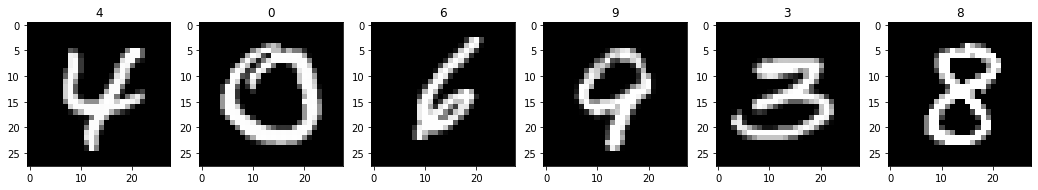

In [4]:
def show_image(train_image, label, index):
    image_shaped = train_image.values.reshape(28,28)
    plt.subplot(1, 6, index+1)
    plt.imshow(image_shaped, cmap=plt.cm.gray)
    plt.title(label)


plt.figure(figsize=(18, 8))
sample_image = train.sample(6).reset_index(drop=True)
for index, row in sample_image.iterrows():
    label = row['label']
    image_pixels = row.drop('label')
    show_image(image_pixels, label, index)
plt.show()

In [5]:
Xtrain = train.drop(columns=['label']).values.reshape(train.shape[0],28,28,1)
Ytrain = train['label']

Xtest = test.values.reshape(test.shape[0],28,28,1)

In [6]:
Xtrain = Xtrain[:, :, :] / 255.
Xtrain = tf.image.resize(Xtrain, (32, 32))
Xtest = Xtest[:, :, :] / 255.
Xtest = tf.image.resize(Xtest, (32, 32))

In [7]:
Xtrain.shape

TensorShape([42000, 32, 32, 1])

In [8]:
Ytrain.shape

(42000,)

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(6, (5, 5), input_shape=(32, 32, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.SGD())

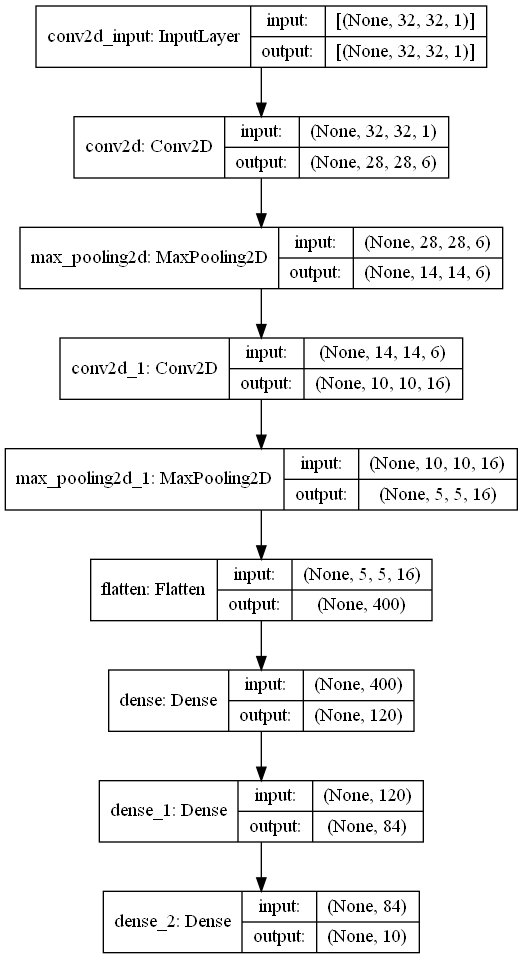

In [10]:
tf.keras.utils.plot_model(model, to_file='model_pic/model.png', show_shapes=True)

In [11]:
history = model.fit(Xtrain, Ytrain, epochs=50)

Epoch 1/50
1313/1313 [==============================] - 9s 5ms/step - loss: 0.6717
Epoch 2/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1717
Epoch 3/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1222
Epoch 4/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0968
Epoch 5/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0805
Epoch 6/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0693
Epoch 7/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0610
Epoch 8/50
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0547
Epoch 9/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0500
Epoch 10/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0449
Epoch 11/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0415
Epoch 12/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0384
E

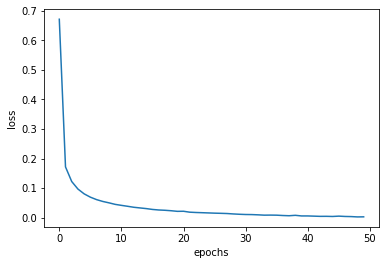

In [12]:
loss = history.history['loss']

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [14]:
predict = model.predict(Xtest)

In [15]:
results = np.argmax(predict, axis = 1) 

In [17]:
output = pd.read_csv("data/sample_submission.csv")
output['Label'] = results
output.to_csv('dist/submission.csv', index = False)